# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Autumn 2023
- Instructor: Stanley Vernier
- Section: Monday/Wednesday 11:10 am
- Student Name: NYJA GOWDA
- Student Email: gowda.32@osu.edu
- Student ID:  500480083

Template Version V8
***

***
# Section: Overview

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
- Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
- Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

Three datasets are provided.  They are two-dimensional datasets.  They have different sizes (number of points) and shapes.  Each dataset contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm.  The files are:

- dataset1_Xydf.csv
- dataset2_Xydf.csv
- dataset3_Xydf.csv

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you must work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams for discussions with the intructor, TA, and classmates!

### What You Need to Turn In:

1. Code
- For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
- This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
- The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
- The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
- When in doubt, ask the grader or instructor.

2. Written Report
- For this homework, the report **is** the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
- The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### How to Turn In Your Work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit your Jupyter Notebook **.ipynb file** to Carmen - **do not ZIP or PDF it**. You do not need to include the input data.

### Grading:

0. Overall readability and organization of your report (5%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
1. Setup and Helper Functions (5%) - Are the Helper Functions (if any) and overall notebook setup correct, well structured, and suitable for use?
2. Evaluation of the K-Means Clustering Algorithm on Dataset1 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3. Evaluation of the K-Means Clustering Algorithm on Dataset2 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4. Evaluation of a Second Clustering Algorithm on Dataset2 (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5. Comparison of the two Clustering Algorithms on Dataset2 (5%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
6. Evaluation of the K-Means Clustering Algorithm on Dataset3 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
7. Evaluation of a Second Clustering Algorithm on Dataset3 (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
8. Comparison of the two Clustering Algorithms on Dataset3 (5%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
9. Conclusions (5%) – Did you document your overall insights? 

### Instructions and Helpful Hints:
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Consider creating re-usable functions for some common operations - you will be doing the same sorts of things multiple times below.
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.

### References and Acknowledgements:

1. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2. https://scikit-learn.org/stable/modules/clustering.html
3. https://docs.python.org/3/library/time.html
4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5. https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [618]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
from time import process_time
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')
np.set_printoptions(linewidth=120)

In [485]:
df = pd.read_csv("D:\dataset1_Xydf.csv")
print(df)

     Unnamed: 0        X0         X1  y
0             0  1.470956 -13.071706  0
1             1 -1.166490  -3.485675  2
2             2  0.255479  -7.072138  2
3             3  4.262335   3.989796  1
4             4  1.530233  -3.386433  2
..          ...       ...        ... ..
395         395  2.380283   7.092951  1
396         396  5.353648 -11.278994  0
397         397  4.891778 -10.683579  0
398         398  3.966481   3.629074  1
399         399  4.361334  -6.909355  2

[400 rows x 4 columns]


In [188]:
def plot_clusters(title, X, y, size):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(size,size))
    plt.title(title)
    plt.xlabel("X0") 
    plt.ylabel("X1")
    plt.scatter(X[:, 0], X[:, 1], s = 40, c = y) 
    plt.show()
    plt.clf()

In [486]:
def remap_cluster_labels(true_y, pred_y):
    # Rearrange the predicted cluster labels so they best match the true ones.
    # This function takes the true and predicted labels, prints the confusion matrix and returns the remapped predicted labels.
    # Situation: A clustering algorithm returns a set of cluster labels.  These labels typically will not be the same as the
    # true cluster labels (because the algorithm does not know anything about the true labels).  For example, the algorithm
    # may return (2,1,2,0,1,0,...) while the true labels are (0,2,0,1,2,1,...). Therefore it is necessary remap 2->0, 1->2,
    # and 0->1 when evaluating the quality of the algorithm.
    # Note: This code has not been tested for cases where there are negative cluster numbers (e.g., -1 for DbScan)
    #       or for cases where the true_y and pred_y matrices are of different lengths.
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
    from scipy.optimize import linear_sum_assignment

    conf_mat = confusion_matrix(true_y, pred_y)  #SciKitLearn convention is rows are true labels, cols are predicted labels
    print("Confusion Matrix: \n",conf_mat)
    print()
    accuracy = accuracy_score(true_y, pred_y)*100
    print("Accuracy: ", accuracy, "%")
    print()
    print("Precision: ",precision_score(true_y,pred_y, average='weighted')*100,"%")
    print()
    print("Recall: ",recall_score(true_y, pred_y, average='weighted')*100,"%")
    # Find the optimal remapping of labels, so the predicted labels best match the true labels.
    # col_index is the predicted label; row_index is the true label to change it to.
    
    # Negate the costs so maximizing the assignment minimizes the mismatches
    row_index, col_index = linear_sum_assignment(conf_mat.max()-conf_mat)

    # Remap the predicted labels.
    new_pred_y = np.zeros(len(pred_y))
    for r in range(0,len(row_index)):
        old = col_index[r]  # the predicted y's
        new = row_index[r]  # remap to the corresponding true y's
        new_pred_y[pred_y == old] = new

    return new_pred_y  # return the remapped labels

In [191]:
def print_evaluation_results(title_string, show_true_cluster_info, show_pred_cluster_info, X, true_y, pred_y, running_time):
    # Print plots
    print(title_string)

    if(show_true_cluster_info):
        print("TRUE:")
        plot_clusters("True", X, true_y, 5)
        
    if(show_pred_cluster_info):
        print("PREDICTED:")     
        plot_clusters("Predicted", X, pred_y, 5)

***
# Section: 1 - Evaluate the **K-Means** Algorithm on **Dataset1**
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
- Print all of the evaluation results.
***

In [765]:
X = df[['X0','X1']].to_numpy()
true_y = df['y'].to_numpy()

DATASET1 TRUE CLUSTER MEASURES:
TRUE:


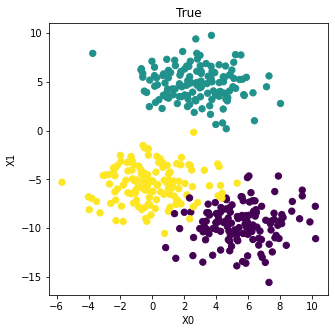

<Figure size 432x288 with 0 Axes>

In [766]:
print_evaluation_results("DATASET1 TRUE CLUSTER MEASURES:", True, False, X, true_y, None, 0.0)

We will now mannually calculate the WSS, BSS, and TSS for our true Y. 

In [610]:
#Calculating the WSS for cluster 0
cluster0 = df[df['y']==0]
ele=cluster0['X0'].tolist()
eley = cluster0['X1'].tolist()
dist0=0
x00=sum(cluster0['X0'])/len(cluster0['X0'])
x10=sum(cluster0['X1'])/len(cluster0['X1'])
for i in range(len(ele)):
    dist0 += (ele[i] - x00)**2 + (eley[i] - x10)**2
    

In [611]:
#Calculating the WSS for cluster 1
cluster1 = df[df['y']==1]
ele=cluster1['X0'].tolist()
eley = cluster1['X1'].tolist()
dist1=0
x00=sum(cluster1['X0'])/len(cluster1['X0'])
x10=sum(cluster1['X1'])/len(cluster1['X1'])
for i in range(len(ele)):
    dist1 += (ele[i] - x00)**2 + (eley[i] - x10)**2
 

In [612]:
#Calculating the WSS for cluster 2
cluster2 = df[df['y']==0]
ele=cluster2['X0'].tolist()
eley = cluster2['X1'].tolist()
dist2=0
x00=sum(cluster2['X0'])/len(cluster2['X0'])
x10=sum(cluster2['X1'])/len(cluster2['X1'])
for i in range(len(ele)):
    dist2 += (ele[i] - x00)**2 + (eley[i] - x10)**2
 

In [613]:
#Calculating the TSS for the true Y we have 
xbar = sum(df['X0'])/len(df['X0'])
ybar = sum(df['X1'])/len(df['X1'])
tss=0
ele = df['X0'].tolist()
eley = df['X1'].tolist()
for i in range(len(ele)):
    tss += (ele[i] - xbar)**2 + (eley[i] - ybar)**2


In [614]:
wss = dist0+dist1+dist2
bss=tss-wss

In [615]:

print("WSS for true Y : ", str(round(wss,2)))
print("TSS for true Y : ",str(round(tss,2)))
print("BSS for true Y : ",str(round(bss,2)))

WSS for true Y :  2857.76
TSS for true Y :  19657.58
BSS for true Y :  16799.82


***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

We will now calcualte the TSS, WSS, and BSS for Dataset 1 with KMeans Algorithm used with k=2,3,4. 
We will observe the plot for WSS values for each no. of parameter and make inferences based on that. 

In [616]:
df=df.dropna()

DATASET1 TRUE CLUSTER MEASURES:
TRUE:


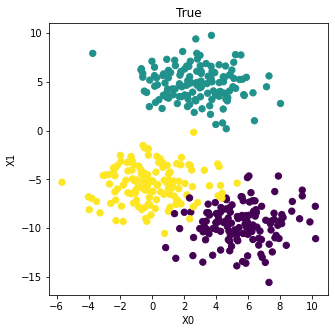

PREDICTED:


<Figure size 432x288 with 0 Axes>

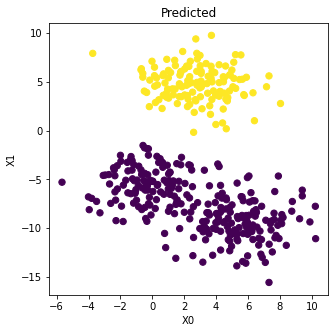

Confusion Matrix: 
 [[134   0   0]
 [  0 133   0]
 [132   1   0]]

Accuracy:  66.75 %

Precision:  49.87780552126585 %

Recall:  66.75 %

Evaluation measures for k= 2
WSS for Y :  6048.57

TSS for Y :  95.78

BSS for Y :  -5952.8

Time taken for iteration :  463.84375

DATASET1 TRUE CLUSTER MEASURES:
TRUE:


<Figure size 432x288 with 0 Axes>

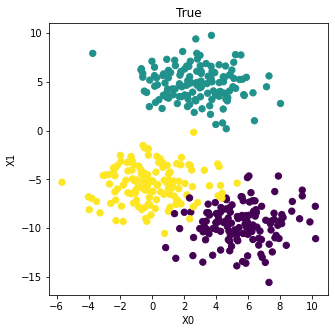

PREDICTED:


<Figure size 432x288 with 0 Axes>

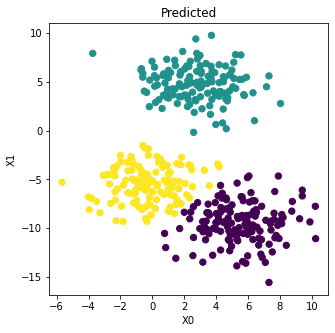

Confusion Matrix: 
 [[132   0   2]
 [  0 133   0]
 [  9   1 123]]

Accuracy:  97.0 %

Precision:  97.08156779930135 %

Recall:  97.0 %

Evaluation measures for k= 3
WSS for Y :  2766.47

TSS for Y :  150.79

BSS for Y :  -2615.68

Time taken for iteration :  464.78125

DATASET1 TRUE CLUSTER MEASURES:
TRUE:


<Figure size 432x288 with 0 Axes>

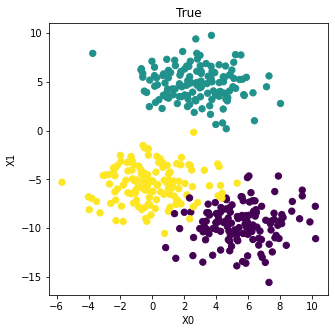

PREDICTED:


<Figure size 432x288 with 0 Axes>

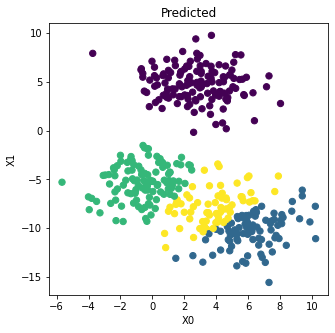

Confusion Matrix: 
 [[  0  87   0  47]
 [133   0   0   0]
 [  1   0 111  21]
 [  0   0   0   0]]

Accuracy:  27.750000000000004 %

Precision:  33.25 %

Recall:  27.750000000000004 %

Evaluation measures for k= 4
WSS for Y :  2400.52

TSS for Y :  177.56

BSS for Y :  -2222.96

Time taken for iteration :  465.921875



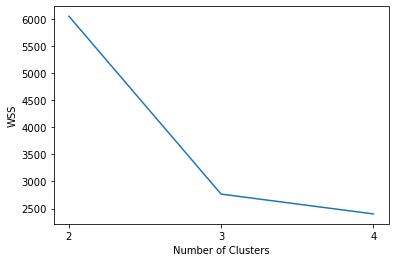

In [768]:
#create list to hold WSS values for each k
wss = []
tss=[]
time=[]
silhouette=[]
i=0
for k in range(2, 5):
    sumval=0
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=None, copy_x=True, algorithm='elkan')
    kmeans.fit(X)
    pred_y= kmeans.fit_predict(X)
    wss.append(kmeans.inertia_)
    print_evaluation_results("DATASET1 TRUE CLUSTER MEASURES:", True, True, X, true_y, pred_y, 5)
    new_y=remap_cluster_labels(true_y, pred_y) 
    for l in range(0,2):
        for p in range (0,2):
            sumval+=(kmeans.cluster_centers_[l][p]**2)
    
    silhouette.append(silhouette_score(X, kmeans.labels_))
    print()
    print("Evaluation measures for k=",k)
    print("WSS for Y : ", str(round(kmeans.inertia_,2)))
    print()
    print("TSS for Y : ",str(round(sumval,2)))
    print()
    print("BSS for Y : ",str(round(sumval-kmeans.inertia_,2)))
    print()
    print("Time taken for iteration : ",process_time())
    print()
    
plt.plot(range(2, 5), wss)
plt.xticks(range(2, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show()

Considering that k=3 returns a low TSS and a high accuracy from the confusion matrix let's see what the better prediction of cluster labels does to the k-means clustering evaluation measures. 

Confusion Matrix: 
 [[  0 132   2]
 [133   0   0]
 [  1   9 123]]

Accuracy:  30.75 %

Precision:  32.717999999999996 %

Recall:  30.75 %
DATASET1 CLUSTER MEASURES:
TRUE:


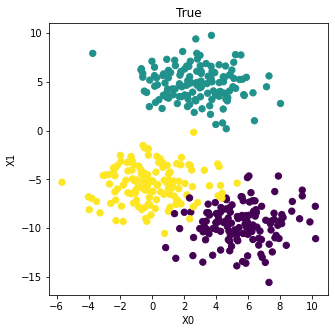

PREDICTED:


<Figure size 432x288 with 0 Axes>

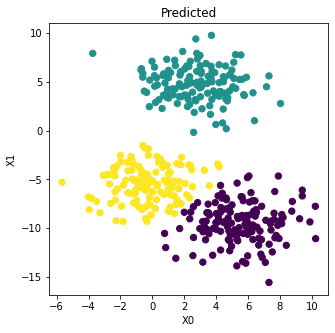

<Figure size 432x288 with 0 Axes>

In [769]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=None, copy_x=True, algorithm='elkan')
pred_y= kmeans.fit_predict(X)
new_y=remap_cluster_labels(true_y, pred_y)
print_evaluation_results("DATASET1 CLUSTER MEASURES:", True, True, X, true_y, new_y, 5)

In [770]:
store=remap_cluster_labels(true_y, new_y)

Confusion Matrix: 
 [[132   0   2]
 [  0 133   0]
 [  9   1 123]]

Accuracy:  97.0 %

Precision:  97.08156779930135 %

Recall:  97.0 %


We can see that the evaluation measures have improved alot hence we have arrived at the most optimal clustering solution. 

***
## Section: 1.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

For K-Means clustering on Dataset2 I've made the following observations:
1. As the number of clusters increases the WSS decreases.
2. The lowest observed TSS/SSE is for k=2, SSE=95.8 
3. The highest evaluation measures (Accuracy, Precision, Recall) are observed for k=3. 
4. The change in WSS value is consistent with our understanding of K-Means clustering as the within cluster error reduces as the    number of parameters increases. 
5. The true y itself has 3 cluster labels hence, it makes sense to go with k=3 for k-means clustering method. 
6. We observe the elbow method occuring at k=3 and that is where the WSS starts slowing down in terms of reduction, this also pushed us towards chooing k=3 as the number of optimal clusters. 

Let's observe the silhouette scores for each value of k=2,3,4.

In [705]:
silhouette

[0.6210908717912055, 0.5903774312281111, 0.47836011363423564]

Using the silhouette scores and the TSS values we can decide that the k with a low TSS and a high silhouette score would be the best choice of k for Dataset1. Hence, we pick k3 (TSS = 150.79, silhouette score = 0.5903).

***
# Section: 2 - Evaluate the **K-Means** Algorithm on **Dataset2**
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [712]:
df2 = pd.read_csv("D:\dataset2_Xydf.csv")
print(df2)

     Unnamed: 0        X0        X1  y
0             0  0.622547 -0.061902  1
1             1 -0.688313 -0.669704  0
2             2 -0.441877 -0.450127  1
3             3 -0.308105 -0.586960  1
4             4  0.660952 -0.840442  0
..          ...       ...       ... ..
395         395 -0.168183  0.688002  1
396         396 -0.684596  0.755614  0
397         397  0.584619 -0.081674  1
398         398  0.325628  0.491185  1
399         399  0.475215  0.969833  0

[400 rows x 4 columns]


In [713]:
df2=df2.dropna()
X = df2[['X0','X1']].to_numpy()
true_y = df2['y'].to_numpy()

DATASET2 TRUE CLUSTER MEASURES:
TRUE:


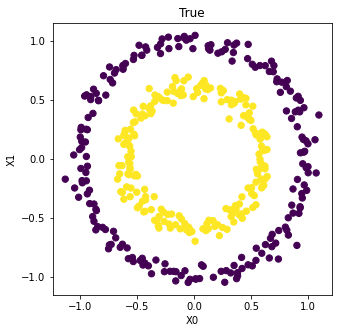

<Figure size 432x288 with 0 Axes>

In [720]:
print_evaluation_results("DATASET2 TRUE CLUSTER MEASURES:", True, False, X, true_y, None, 0.0)

In [715]:
#Calculating the WSS for cluster 0
cluster0 = df2[df2['y']==0]
ele=cluster0['X0'].tolist()
eley = cluster0['X1'].tolist()
dist0=0
x00=sum(cluster0['X0'])/len(cluster0['X0'])
x10=sum(cluster0['X1'])/len(cluster0['X1'])
for i in range(len(ele)):
    dist0 += (ele[i] - x00)**2 + (eley[i] - x10)**2
    

In [716]:
#Calculating the WSS for cluster 1
cluster1 = df2[df2['y']==1]
ele=cluster1['X0'].tolist()
eley = cluster1['X1'].tolist()
dist0=0
x00=sum(cluster1['X0'])/len(cluster1['X0'])
x10=sum(cluster1['X1'])/len(cluster1['X1'])
for i in range(len(ele)):
    dist0 += (ele[i] - x00)**2 + (eley[i] - x10)**2
    

In [717]:
#Calculating the TSS for the true Y we have 
xbar = sum(df2['X0'])/len(df2['X0'])
ybar = sum(df2['X1'])/len(df2['X1'])
tss=0
ele = df2['X0'].tolist()
eley = df2['X1'].tolist()
for i in range(len(ele)):
    tss += (ele[i] - xbar)**2 + (eley[i] - ybar)**2


In [718]:
wss = dist0+dist1+dist2
bss=tss-wss
print("WSS for true Y : ", str(round(wss,2)))
print("TSS for true Y : ",str(round(tss,2)))
print("BSS for true Y : ",str(round(bss,2)))

WSS for true Y :  1948.71
TSS for true Y :  273.59
BSS for true Y :  -1675.12


***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

DATASET2 TRUE CLUSTER MEASURES:
TRUE:


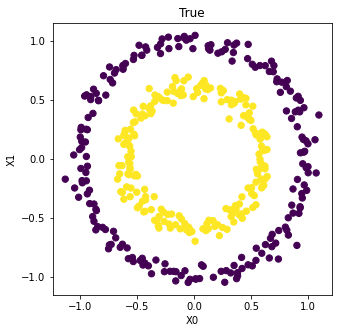

PREDICTED:


<Figure size 432x288 with 0 Axes>

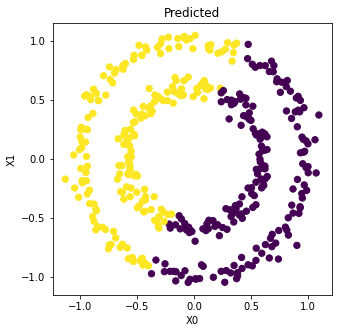

Confusion Matrix: 
 [[ 98 102]
 [100 100]]

Accuracy:  49.5 %

Precision:  49.4999499949995 %

Recall:  49.5 %

Evaluation measures for k= 2
WSS for Y :  168.2

TSS for Y :  0.53

BSS for Y :  -167.67

Time taken for iteration :  274.9375

DATASET2 TRUE CLUSTER MEASURES:
TRUE:


<Figure size 432x288 with 0 Axes>

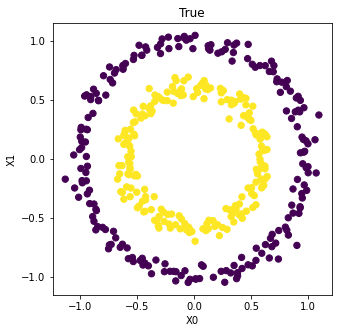

PREDICTED:


<Figure size 432x288 with 0 Axes>

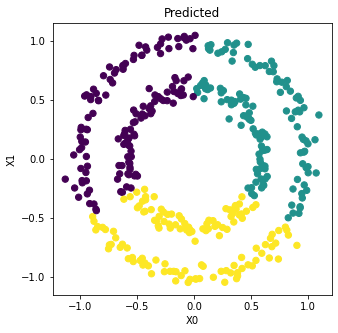

Confusion Matrix: 
 [[68 65 67]
 [66 69 65]
 [ 0  0  0]]

Accuracy:  34.25 %

Precision:  51.11940298507462 %

Recall:  34.25 %

Evaluation measures for k= 3
WSS for Y :  97.19

TSS for Y :  0.89

BSS for Y :  -96.31

Time taken for iteration :  275.5625

DATASET2 TRUE CLUSTER MEASURES:
TRUE:


<Figure size 432x288 with 0 Axes>

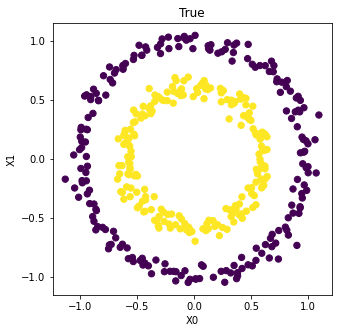

PREDICTED:


<Figure size 432x288 with 0 Axes>

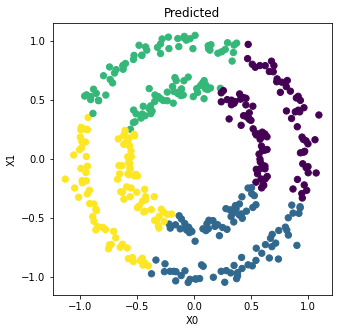

Confusion Matrix: 
 [[47 51 53 49]
 [54 46 45 55]
 [ 0  0  0  0]
 [ 0  0  0  0]]

Accuracy:  23.25 %

Precision:  46.97866693885884 %

Recall:  23.25 %

Evaluation measures for k= 4
WSS for Y :  64.25

TSS for Y :  1.05

BSS for Y :  -63.2

Time taken for iteration :  276.296875



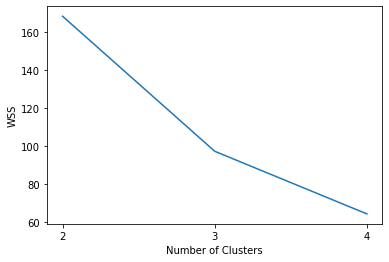

In [721]:
#create list to hold WSS values for each k
wss = []
tss=[]
time=[]
silhouette=[]
i=0
for k in range(2, 5):
    sumval=0
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=None, copy_x=True, algorithm='elkan')
    kmeans.fit(X)
    pred_y= kmeans.fit_predict(X)
    wss.append(kmeans.inertia_)
    print_evaluation_results("DATASET2 TRUE CLUSTER MEASURES:", True, True, X, true_y, pred_y, 5)
    new_y=remap_cluster_labels(true_y, pred_y) 
    for l in range(0,2):
        for p in range (0,2):
            sumval+=(kmeans.cluster_centers_[l][p]**2)
    
    silhouette.append(silhouette_score(X, kmeans.labels_))
    print()
    print("Evaluation measures for k=",k)
    print("WSS for Y : ", str(round(kmeans.inertia_,2)))
    print()
    print("TSS for Y : ",str(round(sumval,2)))
    print()
    print("BSS for Y : ",str(round(sumval-kmeans.inertia_,2)))
    print()
    print("Time taken for iteration : ",process_time())
    print()
    
plt.plot(range(2, 5), wss)
plt.xticks(range(2, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show()

Here we observe that k=2 has the lowest TSS and the highest accuracy and precision, hence let's find a more closer prediction of cluster labels for Dataset2 and see how the evaluation measures change. 

Confusion Matrix: 
 [[ 99 101]
 [ 99 101]]

Accuracy:  50.0 %

Precision:  50.0 %

Recall:  50.0 %
DATASET2 TRUE CLUSTER MEASURES:
TRUE:


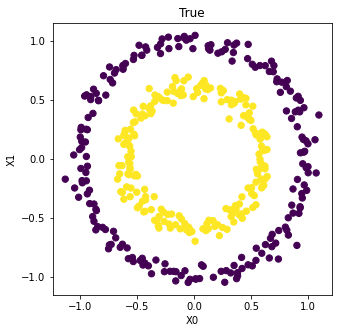

PREDICTED:


<Figure size 432x288 with 0 Axes>

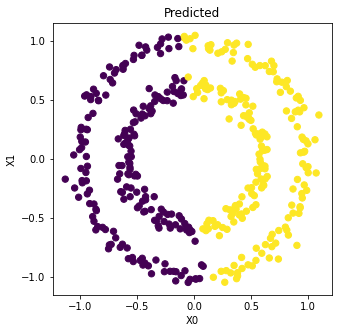

<Figure size 432x288 with 0 Axes>

In [723]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=None, copy_x=True, algorithm='elkan')
pred_y= kmeans.fit_predict(X)
holder=remap_cluster_labels(true_y, pred_y)
print_evaluation_results("DATASET2 TRUE CLUSTER MEASURES:", True, True, X, true_y, holder, 5)

We see that the evaluation measures do not change a lot, hence we have arrived at the most optimal clustering labels predicted for k=2 for Dataset2. 

***
## Section: 2.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

For K-Means clustering on Dataset2 I've made the following observations:

1. As the number of clusters increases the WSS decreases. 
2. The lowest observed TSS/SSE is for k=2, SSE=0.53
3. The highest evaluation measures (Accuracy, Precision, Recall) are observed for k=2. 
4. The change in WSS value is consistent with our understanding of K-Means clustering as the within cluster error reduces as the    number of parameters increases. 
5. The true y itself has 2 cluster labels hence, it makes sense to go with k=2 for k-means clustering method. 

Let's now take a look at the silhouette scores for Dataset2:

In [724]:
silhouette

[0.3733506185290107, 0.4157111055873678, 0.415567870771456]

Using the silhouette scores and the TSS values we can decide that the k with the lowest TSS and a high silhouette score would be the best choice of k for Dataset1. Hence, we pick k=2 (TSS = 0.53, silhouette score = 0.373).

***
# Section: 3 - Evaluate a **Second** Clustering Algorithm on **Dataset2**
***

***
## Section: 3.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

I will be applying the spectral clustering algorithm since it is very useful when the structure of the individual clusters is highly non-convex, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane.

In [409]:
from sklearn.cluster import SpectralClustering
#Reference taken from askPython:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html


***
## Section: 3.2 - Configure and Run the Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for (at least) two variations of the configuration settings (if any).
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

DATASET2 TRUE CLUSTER MEASURES:
TRUE:


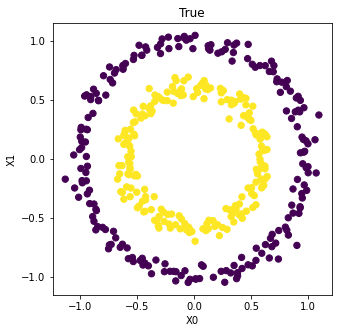

PREDICTED:


<Figure size 432x288 with 0 Axes>

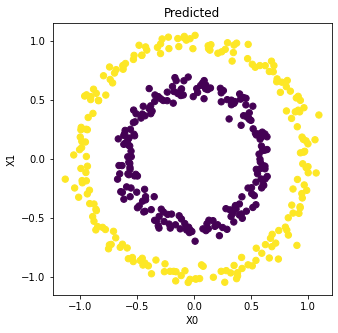

Confusion Matrix: 
 [[  0 200]
 [200   0]]

Accuracy:  0.0 %

Precision:  0.0 %

Recall:  0.0 %

Evaluation measures for k= 2
WSS for Y :  6860217157.56

TSS for Y :  273.59

BSS for Y :  -6860216883.97

Time taken for iteration :  282.34375

DATASET2 TRUE CLUSTER MEASURES:
TRUE:


<Figure size 432x288 with 0 Axes>

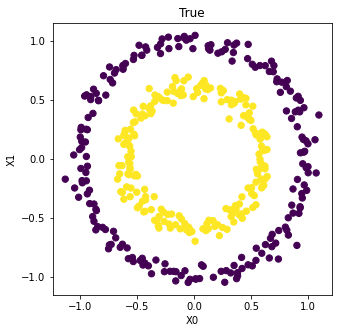

PREDICTED:


<Figure size 432x288 with 0 Axes>

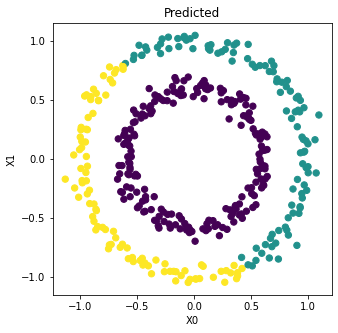

Confusion Matrix: 
 [[  0 105  95]
 [200   0   0]
 [  0   0   0]]

Accuracy:  0.0 %

Precision:  0.0 %

Recall:  0.0 %

Evaluation measures for k= 3
WSS for Y :  6865540371.07

TSS for Y :  273.59

BSS for Y :  -6865540097.48

Time taken for iteration :  283.078125

DATASET2 TRUE CLUSTER MEASURES:
TRUE:


<Figure size 432x288 with 0 Axes>

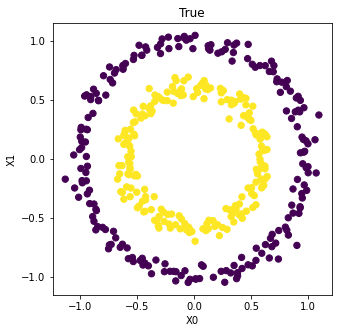

PREDICTED:


<Figure size 432x288 with 0 Axes>

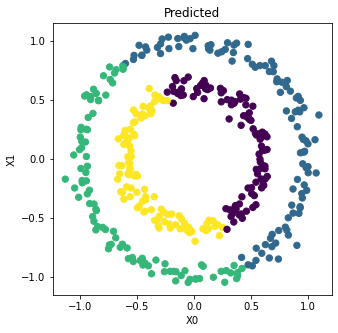

Confusion Matrix: 
 [[  0 105  95   0]
 [101   0   0  99]
 [  0   0   0   0]
 [  0   0   0   0]]

Accuracy:  0.0 %

Precision:  0.0 %

Recall:  0.0 %

Evaluation measures for k= 4
WSS for Y :  6870863537.32

TSS for Y :  273.59

BSS for Y :  -6870863263.73

Time taken for iteration :  283.75



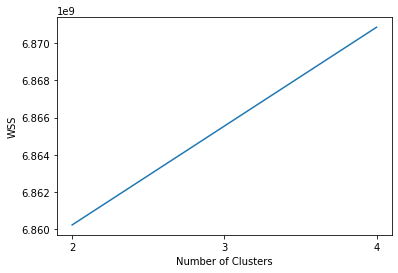

In [734]:
#create list to hold WSS values for each k
wss = []
tss=[]
time=[]
for k in range(2, 5):
    sumval=0
    clustering = SpectralClustering(n_clusters=k,affinity='nearest_neighbors',random_state=0)
    pred_y= clustering.fit_predict(X)
    for label in range(k):
        cluster_points = df2[label==pred_y]
        centroid = np.mean(cluster_points, axis=0)
        wss_cluster += np.sum(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)
    wss.append(wss_cluster)
    print_evaluation_results("DATASET2 TRUE CLUSTER MEASURES:", True, True, X, true_y, pred_y, 5)
    new_y=remap_cluster_labels(true_y, pred_y)
    tss = np.sum(np.square(X-X.mean()))
    print()
    print("Evaluation measures for k=",k)
    print("WSS for Y : ", str(round(wss_cluster,2)))
    print()
    print("TSS for Y : ",str(round(tss,2)))
    print()
    print("BSS for Y : ",str(round(tss-wss_cluster,2)))
    print()
    print("Time taken for iteration : ",process_time())
    print()
    
plt.plot(range(2, 5), wss)
plt.xticks(range(2, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show() 

Here we observe that k=2 has the lowest WSS and the h, hence let's find a more closer prediction of cluster labels for Dataset2 and see how the evaluation measures change. 

Confusion Matrix: 
 [[  0 200]
 [200   0]]

Accuracy:  0.0 %

Precision:  0.0 %

Recall:  0.0 %
DATASET2 TRUE CLUSTER MEASURES:
TRUE:


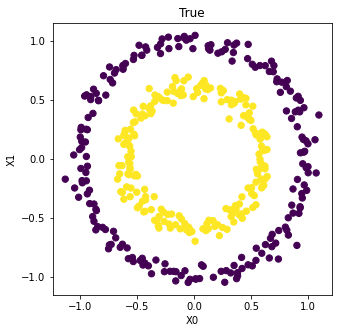

PREDICTED:


<Figure size 432x288 with 0 Axes>

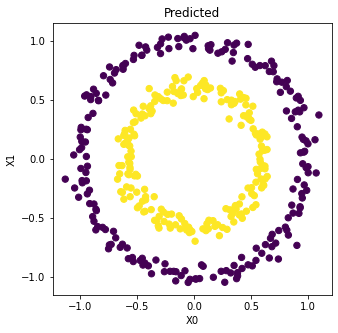

Confusion Matrix: 
 [[200   0]
 [  0 200]]

Accuracy:  100.0 %

Precision:  100.0 %

Recall:  100.0 %


<Figure size 432x288 with 0 Axes>

In [736]:
clustering = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',random_state=0)
pred_y= clustering.fit_predict(X)
new_y=remap_cluster_labels(true_y, pred_y)
print_evaluation_results("DATASET2 TRUE CLUSTER MEASURES:", True, True, X, true_y, new_y, 5)
holder=remap_cluster_labels(true_y, new_y)

We were able to improve the predicted cluster labels and achieve a 100% evaluation measure rate across all the measures. Hence, we will go with k=2 for this data set. 

***
## Section: 3.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

For Spiral Clustering on Dataset2 I've made the following observations:
1. As the number of clusters increases the WSS increases. 
2. The lowest observed WSS is for k=2, WSS = 6860217157.56 
3. The highest evaluation measures (Accuracy, Precision, Recall) are observed for k=2 which is at a 100%. 
4. The change in WSS value is consistent with our understanding of spiral clustering as the within cluster error increases as the number of parameters increases. 
5. The true y itself has 2 cluster labels hence, it makes sense to go with k=2 for spiral clustering method. 

Based, on these observations I will go with k=2 clusters for the Dataset2. This is because of the lowest reported WSS (6860217157.56) and 100% accuracy and 100% precision through the confusion matrix. 

***
# Section: 4 - Comparison of the Two Clustering Algorithms on **Dataset2**
***

***
## Section: 4.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

Quality:

We will observe the evaluation measures->

K-means:
WSS: 168.2
TSS: 0.53
Accuracy (highest): 50%
Precision (highest): 50%
Recall (highest): 50%

Spiral Clustering:
WSS: 6860217157.56
TSS: 273.59
Accuracy (highest): 100%
Precision (highest): 100%
Recall (highest): 100%

Time:
Let's take the averages for all iterations->
K-Means: 283.04

Spiral Clustering: 275.6

The structure of the dataset is the characteristic that determines the performance of the clustering algorithms performance. This data set is highly convex and has a pattern and as a result of that a particular clustering method outperforms another clustering method. 

***
## Section: 4.2 - Choose the Better Clustering Algorithm
- Choose one of the two clustering algorithm as better and explain why.
***

The best clustering algorithm for this dataset is *Spriral Clustering* since it has a lower time of processing (275.6 < 283.04) and the highest values for our evaluation measures (Accuracy, Precision, and Recall). 

***
# Section: 5 - Evaluate the **K-Means** Algorithm on **Dataset3**
***

***
## Section: 5.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [737]:
df3 = pd.read_csv("D:\dataset3_Xydf.csv")
print(df3)

      Unnamed: 0        X0        X1  y
0              0  0.423360 -0.468893  1
1              1  0.722468 -0.358799  1
2              2 -1.027149  0.395235  0
3              3  0.024089  0.472145  1
4              4 -0.544188  0.487036  0
...          ...       ...       ... ..
2995        2995  1.744222 -0.126395  1
2996        2996 -0.262042  0.992212  0
2997        2997 -0.606136  0.781923  0
2998        2998  0.947661  0.484166  0
2999        2999 -0.618645  0.882727  0

[3000 rows x 4 columns]


DATASET3 TRUE CLUSTER MEASURES:
TRUE:


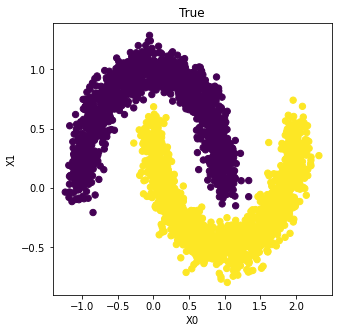

<Figure size 432x288 with 0 Axes>

In [738]:
df3=df3.dropna()
X = df3[['X0','X1']].to_numpy()
true_y = df3['y'].to_numpy()
print_evaluation_results("DATASET3 TRUE CLUSTER MEASURES:", True, False, X, true_y, None, 0.0)

In [739]:
#Calculating the WSS for cluster 0
cluster0 = df3[df3['y']==0]
ele=cluster0['X0'].tolist()
eley = cluster0['X1'].tolist()
dist0=0
x00=sum(cluster0['X0'])/len(cluster0['X0'])
x10=sum(cluster0['X1'])/len(cluster0['X1'])
for i in range(len(ele)):
    dist0 += (ele[i] - x00)**2 + (eley[i] - x10)**2
    

In [740]:
#Calculating the WSS for cluster 1
cluster1 = df3[df3['y']==1]
ele=cluster1['X0'].tolist()
eley = cluster1['X1'].tolist()
dist0=0
x00=sum(cluster0['X0'])/len(cluster0['X0'])
x10=sum(cluster0['X1'])/len(cluster0['X1'])
for i in range(len(ele)):
    dist0 += (ele[i] - x00)**2 + (eley[i] - x10)**2
    

In [743]:
#Calculating the TSS for the true Y we have 
xbar = sum(df2['X0'])/len(df2['X0'])
ybar = sum(df2['X1'])/len(df2['X1'])
tss=0
ele = df2['X0'].tolist()
eley = df2['X1'].tolist()
for i in range(len(ele)):
    tss += (ele[i] - xbar)**2 + (eley[i] - ybar)**2

In [742]:
wss = dist0+dist1+dist2
bss=tss-wss
print("WSS for true Y : ", str(round(wss,2)))
print("TSS for true Y : ",str(round(tss,2)))
print("BSS for true Y : ",str(round(bss,2)))

WSS for true Y :  5225.24
TSS for true Y :  273.59
BSS for true Y :  -4951.65


***
## Section: 5.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

DATASET3 CLUSTER MEASURES:
TRUE:


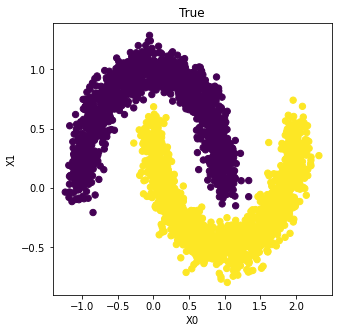

PREDICTED:


<Figure size 432x288 with 0 Axes>

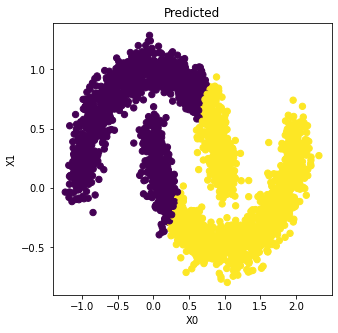

WSS for dataset3 with k= 2 :  1250.22

TSS for dataset3 with k= 2 :  1.82

BSS for dataset3 with k= 2 :  1248.4

Time taken for dataset3 with k= 2  :  331.65625

Confusion Matrix: 
 [[1113  387]
 [ 364 1136]]

Accuracy:  74.96666666666667 %

Precision:  74.97253798782025 %

Recall:  74.96666666666667 %
DATASET3 CLUSTER MEASURES:
TRUE:


<Figure size 432x288 with 0 Axes>

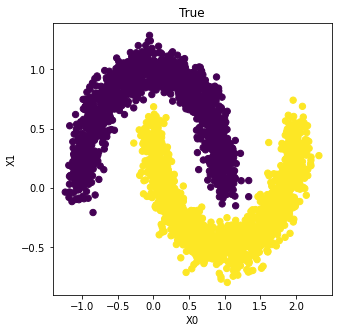

PREDICTED:


<Figure size 432x288 with 0 Axes>

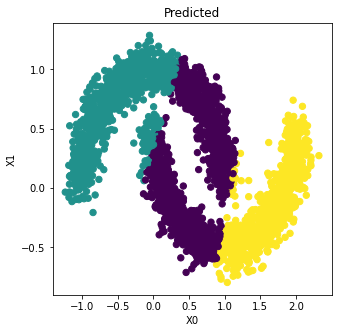

WSS for dataset3 with k= 3 :  833.99

TSS for dataset3 with k= 3 :  1.01

BSS for dataset3 with k= 3 :  832.97

Time taken for dataset3 with k= 3  :  333.796875

Confusion Matrix: 
 [[582 903  15]
 [632  85 783]
 [  0   0   0]]

Accuracy:  22.233333333333334 %

Precision:  28.271965396954563 %

Recall:  22.233333333333334 %
DATASET3 CLUSTER MEASURES:
TRUE:


<Figure size 432x288 with 0 Axes>

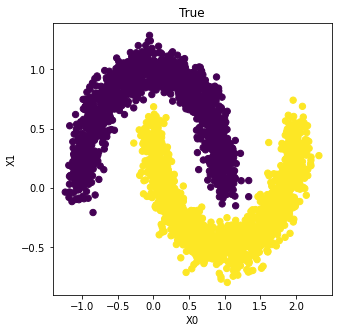

PREDICTED:


<Figure size 432x288 with 0 Axes>

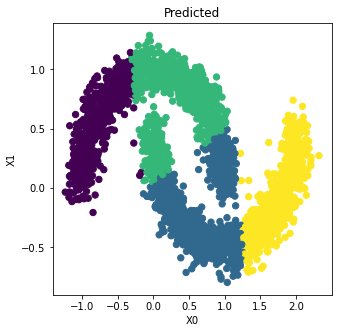

WSS for dataset3 with k= 4 :  551.0

TSS for dataset3 with k= 4 :  1.4

BSS for dataset3 with k= 4 :  549.6

Time taken for dataset3 with k= 4  :  336.140625

Confusion Matrix: 
 [[603 213 680   4]
 [  3 669 199 629]
 [  0   0   0   0]
 [  0   0   0   0]]

Accuracy:  42.4 %

Precision:  87.67764531555196 %

Recall:  42.4 %


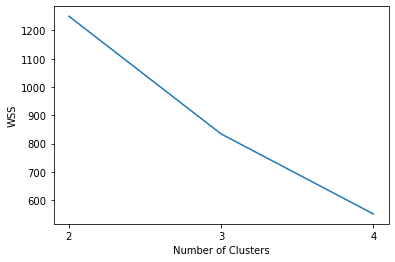

In [754]:
#create list to hold WSS values for each k
wss = []
tss=[]
time=[]
silhouette=[]
for k in range(2, 5):
    sumval=0
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=None, copy_x=True, algorithm='elkan')
    kmeans.fit(X)
    pred_y= kmeans.fit_predict(X)
    print_evaluation_results("DATASET3 CLUSTER MEASURES:", True, True, X, true_y, pred_y, 5)
    wss.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))
    for l in range(0,2):
        for p in range (0,2):
            sumval+=(kmeans.cluster_centers_[l][p]**2)
    
    print("WSS for dataset3 with k=",k,": ", str(round(kmeans.inertia_,2)))
    print()
    print("TSS for dataset3 with k=",k,": ",str(round(sumval,2)))
    print()
    print("BSS for dataset3 with k=",k,": ",str(round(kmeans.inertia_-sumval,2)))
    print()
    print("Time taken for dataset3 with k=",k," : ",process_time())
    print()
    new_y=remap_cluster_labels(true_y, pred_y) 
    
plt.plot(range(2, 5), wss)
plt.xticks(range(2, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show()

For this dataset it seems like the highest accuracy, recall, and precision is observed with k=2 clusters. Let's see how much we can imporve the evaluation measures by using the new predicted cluster labels our function returns. 

Confusion Matrix: 
 [[1113  387]
 [ 364 1136]]

Accuracy:  74.96666666666667 %

Precision:  74.97253798782025 %

Recall:  74.96666666666667 %
DATASET1 TRUE CLUSTER MEASURES:
TRUE:


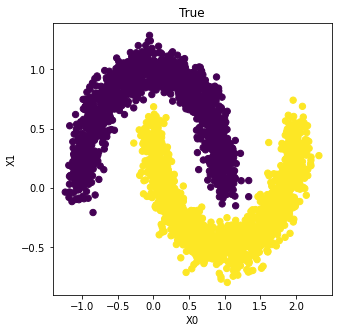

PREDICTED:


<Figure size 432x288 with 0 Axes>

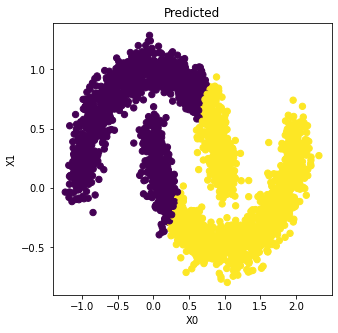

Confusion Matrix: 
 [[1113  387]
 [ 364 1136]]

Accuracy:  74.96666666666667 %

Precision:  74.97253798782025 %

Recall:  74.96666666666667 %


<Figure size 432x288 with 0 Axes>

In [757]:
kmeans = KMeans(n_clusters=2, init="k-means++",random_state=None, algorithm='elkan')
pred_y= kmeans.fit_predict(X)
new_y=remap_cluster_labels(true_y, pred_y)
print_evaluation_results("DATASET1 TRUE CLUSTER MEASURES:", True, True, X, true_y, new_y, 5)
holder=remap_cluster_labels(true_y, new_y)

Here we can see that there is clear improvement, as on top is the evaluation measures we arrived at for the initial k=2 cluster labels and upon receiving a new prediction cluster labels, the evaluation performance improved. Hence we have found the most optimal prediction for cluster labels. 

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

For K-Means clustering on Dataset2 I've made the following observations:

1. As the number of clusters increases the WSS decreases. 
2. The lowest observed TSS/SSE is for k=3, SSE=1.01
3. The highest evaluation measures (Accuracy, Precision, Recall) are observed for k=2. 
4. The change in WSS value is consistent with our understanding of K-Means clustering as the within cluster error reduces as the    number of parameters increases. 
5. The true y itself has 2 cluster labels hence, it makes sense to go with k=2 for k-means clustering method. 

Let's now take a look at the silhouette scores for Dataset2:

In [758]:
silhouette

[0.4824940619498147, 0.4204733764341908, 0.4457418118484178]

The highest silhouette value is observed for k=2 number of labels. The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters. Hence, the higher the silhouette value the better. 

***
# Section: 6 - Evaluate a **Second** Clustering Algorithm on **Dataset3**
***

***
## Section: 6.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

I will be applying the spectral clustering algorithm since it is very useful when the structure of the individual clusters is highly non-convex, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are not completely linear and produce different shapes and patterns on the 2D plane.

***
## Section: 6.2 - Configure and Run the Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for (at least) two variations of the configuration settings (if any).
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

DATASET3 CLUSTER MEASURES:
TRUE:


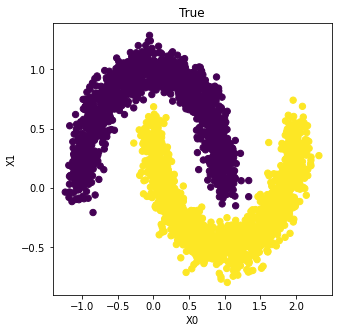

PREDICTED:


<Figure size 432x288 with 0 Axes>

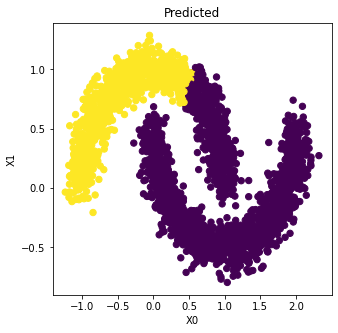

WSS for dataset3 with k= 2 :  42862780342.85

TSS for dataset3 with k= 2 :  3152.0

BSS for dataset3 with k= 2 :  -42862777190.85

Time taken for dataset3 with k= 2  :  447.9375

Confusion Matrix: 
 [[ 498 1002]
 [1500    0]]

Accuracy:  16.6 %

Precision:  12.46246246246246 %

Recall:  16.6 %
DATASET3 CLUSTER MEASURES:
TRUE:


<Figure size 432x288 with 0 Axes>

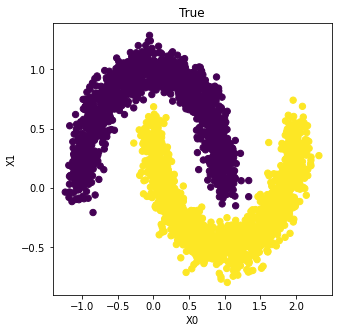

PREDICTED:


<Figure size 432x288 with 0 Axes>

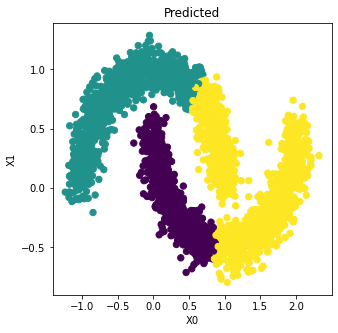

WSS for dataset3 with k= 3 :  45112129696.01

TSS for dataset3 with k= 3 :  3152.0

BSS for dataset3 with k= 3 :  -45112126544.01

Time taken for dataset3 with k= 3  :  455.1875

Confusion Matrix: 
 [[   0 1053  447]
 [ 683    0  817]
 [   0    0    0]]

Accuracy:  0.0 %

Precision:  0.0 %

Recall:  0.0 %
DATASET3 CLUSTER MEASURES:
TRUE:


<Figure size 432x288 with 0 Axes>

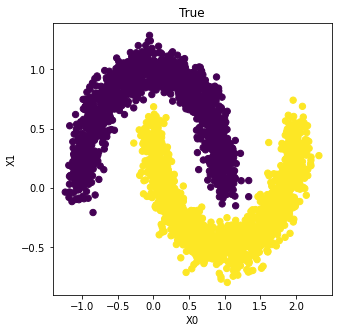

PREDICTED:


<Figure size 432x288 with 0 Axes>

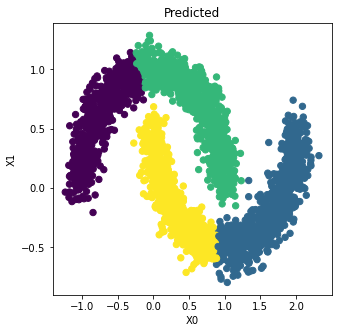

WSS for dataset3 with k= 4 :  47361378947.86

TSS for dataset3 with k= 4 :  3152.0

BSS for dataset3 with k= 4 :  -47361375795.85

Time taken for dataset3 with k= 4  :  459.25

Confusion Matrix: 
 [[651   2 847   0]
 [  0 802   0 698]
 [  0   0   0   0]
 [  0   0   0   0]]

Accuracy:  48.43333333333334 %

Precision:  99.87562189054727 %

Recall:  48.43333333333334 %


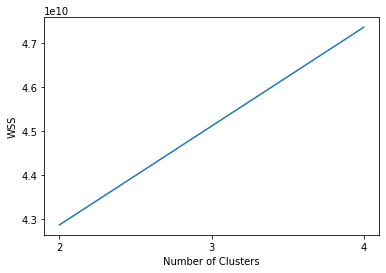

In [764]:
#create list to hold WSS values for each k
wss = []
tss=[]
time=[]
for k in range(2, 5):
    sumval=0
    clustering = SpectralClustering(n_clusters=k,affinity='nearest_neighbors',random_state=0)
    pred_y= clustering.fit_predict(X)
    print_evaluation_results("DATASET3 CLUSTER MEASURES:", True, True, X, true_y, pred_y, 5)
    for label in range(k):
        cluster_points = df3[label==pred_y]
        centroid = np.mean(cluster_points, axis=0)
        wss_cluster += np.sum(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)
    wss.append(wss_cluster) 
    print("WSS for dataset3 with k=",k,": ", str(round(wss_cluster,2)))
    print()
    print("TSS for dataset3 with k=",k,": ",str(round(np.sum(np.square(X-X.mean())),2)))
    print()
    print("BSS for dataset3 with k=",k,": ",str(round(np.sum(np.square(X-X.mean()))-wss_cluster,2)))
    print()
    print("Time taken for dataset3 with k=",k," : ",process_time())
    print()
    new_y=remap_cluster_labels(true_y, pred_y)
    
plt.plot(range(2, 5), wss)
plt.xticks(range(2, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show() 

***
## Section: 6.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

For Spiral Clustering on Dataset2 I've made the following observations:
1. As the number of clusters increases the WSS increases. 
2. The lowest observed WSS is for k=2, WSS = 42862780342.85 
3. The highest evaluation measures (Accuracy, Precision, Recall) are observed for k=4 which is at ~ 70%. 
4. The change in WSS value is consistent with our understanding of spiral clustering as the within cluster error increases as the number of parameters increases. 
5. The true y itself has 2 cluster labels hence, it makes sense to go with k=2 for spiral clustering method. 

***
# Section: 7 - Comparison of the Two Clustering Algorithms on **Dataset3**
***

***
## Section: 7.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

Quality:

We will observe the evaluation measures->

K-means:
WSS: 1250.22
TSS: 1.82
Accuracy (highest): 74.96%
Precision (highest): 74.97%
Recall (highest): 74.96%

Spiral Clustering:
WSS: 42862780342.85
TSS: 3152
Accuracy (highest): 48.43%
Precision (highest): 99.87%
Recall (highest): 48.43%

Time:
Let's take the averages for all iterations->
K-Means: 333.86

Spiral Clustering: 454.1225

The structure of the dataset is the characteristic that determines the performance of the clustering algorithms performance. This data set has a pattern and as a result of that a particular clustering method outperforms another clustering method. 

***
## Section: 7.2 - Choose the Better Clustering Algorithm
- Choose one of the two clustering algorithm as better and explain why.
***

The best clustering algorithm for this dataset is *K-Means Clustering* since it has a lower time of processing (333.86 < 454.1225) and the highest values for our evaluation measures (Accuracy, Precision, and Recall). 

***
# Section: 8 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

In the assignment involving clustering various datasets using k-means and spiral clustering, I gained valuable insights into the nuances of unsupervised machine learning and the importance of choosing the optimal number of clusters (k). The process involved applying the k-means algorithm to diverse datasets, each with its unique characteristics, and employing spiral clustering to handle patterns like spirals within the data. To determine the best k value for each dataset, I employed two prominent methods: the TSS/WSS value method and the Silhouette Score. The TSS/WSS allowed me to observe the point at which the within squares error or the total squared error was the lowest, indicating a potentially optimal k. Meanwhile, the Silhouette Score provided a quantitative measure of how well-defined the clusters were, aiding in the selection of an appropriate k. This assignment not only improved my proficiency in implementing clustering algorithms but also emphasized the need for a thoughtful approach to k selection based on the dataset's specific characteristics and patterns. It underscored the significance of leveraging multiple methods to ensure robust and meaningful cluster identification in diverse datasets.

***
### END-OF-SUBMISSION
***